# TD4 : Analyse en composantes principales

In [2]:
# Import des libraires
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import seaborn as sn


In [3]:
# Fonction auxiliaire

import matplotlib.pyplot as plt


def add_labels(x, y, labels, ax=None):
    """Ajoute les étiquettes `labels` aux endroits définis par `x` et `y`."""

    if ax is None:
        ax = plt.gca()
    for x, y, label in zip(x, y, labels):
        ax.annotate(
            label, [x, y], xytext=(10, -5), textcoords="offset points",
        )

    return ax

In [4]:
# Lecture du jeu de données
notes = pd.read_csv("data/notes.txt", sep = "\s+")
notes

,math,scie,fran,lati,d-m
jean,6.0,6.0,5.0,5.5,8
alin,8.0,8.0,8.0,8.0,9
anni,6.0,7.0,11.0,9.5,11
moni,14.5,14.5,15.5,15.0,8
didi,14.0,14.0,12.0,12.5,10
andr,11.0,10.0,5.5,7.0,13
pier,5.5,7.0,14.0,11.5,10
brig,13.0,12.5,8.5,9.5,12
evel,9.0,9.5,12.5,12.0,18


In [5]:
cls = PCA(n_components=5)
pcs = cls.fit_transform(notes)
cls.components_

array([[ 0.51453535,  0.50698853,  0.49235486,  0.48462835,  0.03062778],
       [-0.56694916, -0.37199576,  0.65035356,  0.32323853,  0.11289333],
       [ 0.05132308,  0.01445296, -0.10806565, -0.02254331,  0.99245689],
       [-0.28874852,  0.55305647,  0.39373536, -0.67419539,  0.03443659],
       [-0.57254891,  0.54635285, -0.40978192,  0.45343643, -0.01266839]])

In [6]:
pcs

array([[-8.70090684, -1.70270455, -2.55391818, -0.14945398,  0.11731596],
       [-3.93859585, -0.70854405, -1.81046443, -0.09068389, -0.04349922],
       [-3.20939241,  3.45905516, -0.30066167,  0.17254286, -0.01928215],
       [ 9.75574148,  0.21574207, -3.34367256, -0.17347137, -0.10041455],
       [ 6.37142221, -2.17333261, -0.95705878,  0.07066256,  0.18799232],
       [-2.97401714, -4.65093218,  2.63494569, -0.02321315, -0.14809545],
       [-1.05096657,  6.22717416, -1.68806364,  0.11529582, -0.04281219],
       [ 1.98053256, -4.06855621,  1.40071215,  0.24321198, -0.01039742],
       [ 1.76618257,  3.40209823,  6.61818142, -0.16489082,  0.0591927 ]])

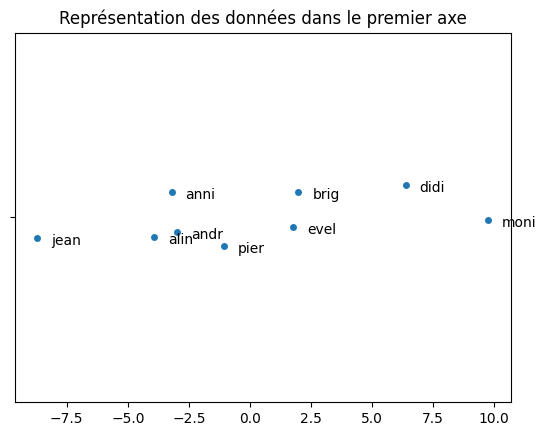

In [7]:
# Visualisation des étudiants dans le premier plan factoriel

ax = sn.stripplot(x = pcs[:, 0])
loc = ax.get_children()[0].get_offsets().data
add_labels(*loc.T, notes.index)
plt.title("Représentation des données dans le premier axe")
plt.show()

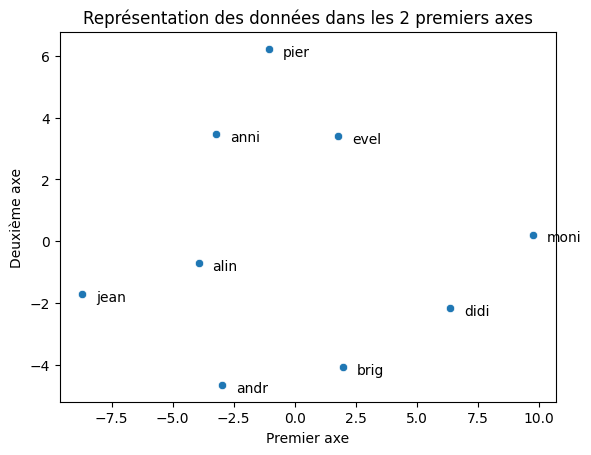

In [8]:
# Visualisation des étudiants dans le premier plan factoriel

ax = sn.scatterplot(x = pcs[:, 0], y = pcs[:, 1]).set(xlabel = "Premier axe", ylabel = "Deuxième axe")
add_labels(pcs[:, 0], pcs[:, 1], notes.index)
plt.title("Représentation des données dans les 2 premiers axes")
plt.show()

In [9]:
data = np.array([[8, 6, 10, 9, 14], [10, 11, 4.5, 8, 6]])
nouvelles_notes = pd.DataFrame(data = data, columns=["math", "scie", "fran", "lati", "d-m"], index=["Alice", "Steve"])
nouvelles_notes

,math,scie,fran,lati,d-m
Alice,8.0,6.0,10.0,9.0,14.0
Steve,10.0,11.0,4.5,8.0,6.0


In [10]:
notes2 = pd.concat([notes, nouvelles_notes])
notes2

,math,scie,fran,lati,d-m
jean,6.0,6.0,5.0,5.5,8.0
alin,8.0,8.0,8.0,8.0,9.0
anni,6.0,7.0,11.0,9.5,11.0
moni,14.5,14.5,15.5,15.0,8.0
didi,14.0,14.0,12.0,12.5,10.0
andr,11.0,10.0,5.5,7.0,13.0
pier,5.5,7.0,14.0,11.5,10.0
brig,13.0,12.5,8.5,9.5,12.0
evel,9.0,9.5,12.5,12.0,18.0
Alice,8.0,6.0,10.0,9.0,14.0


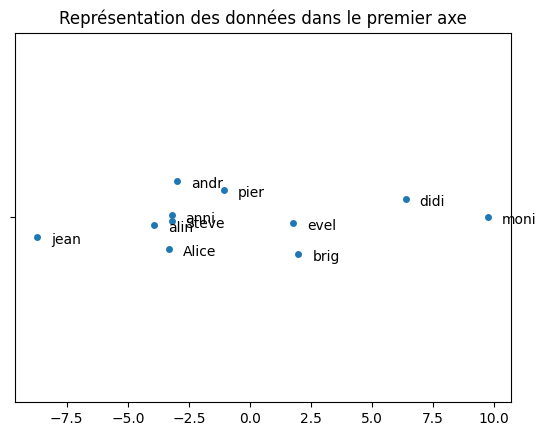

In [11]:
# Représentation des nouveaux étudiants
pcs_Y = cls.transform(notes2)
ax = sn.stripplot(x = pcs_Y[:, 0])
loc = ax.get_children()[0].get_offsets().data
add_labels(*loc.T, notes2.index)
plt.title("Représentation des données dans le premier axe")
plt.show()

## 1.2 ACP sur les données "Crabs"

In [12]:
crabs = pd.read_csv("data/crabs.csv", sep="\s+")
crabsquant = crabs.iloc[:, 3:8]
crabsquant

,FL,RW,CL,CW,BD
0,8.1,6.7,16.1,19.0,7.0
1,8.8,7.7,18.1,20.8,7.4
2,9.2,7.8,19.0,22.4,7.7
3,9.6,7.9,20.1,23.1,8.2
4,9.8,8.0,20.3,23.0,8.2
...,...,...,...,...,...
195,21.4,18.0,41.2,46.2,18.7
196,21.7,17.1,41.7,47.2,19.6
197,21.9,17.2,42.6,47.4,19.5
198,22.5,17.2,43.0,48.7,19.8


### 1.2.1 Analyse exploratoire

<Axes: xlabel='Caracteristique', ylabel='Valeur'>

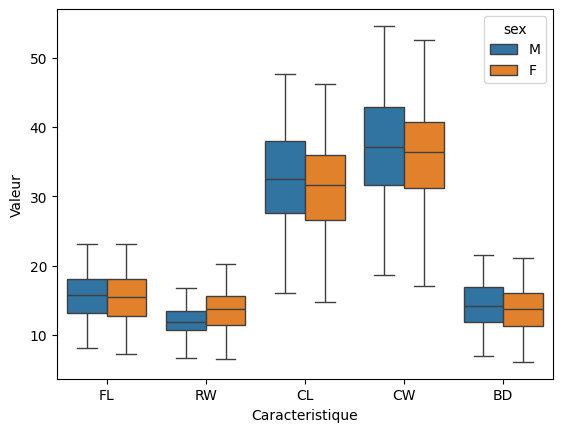

In [13]:
crbas_melt = crabs.melt(id_vars=["sp", 'sex', "index"], value_vars=["FL", "RW", "CL", "CW", "BD"], value_name="Valeur", var_name="Caracteristique")
sn.boxplot(data = crbas_melt, y = "Valeur", x="Caracteristique", hue="sex")

<Axes: xlabel='Caracteristique', ylabel='Valeur'>

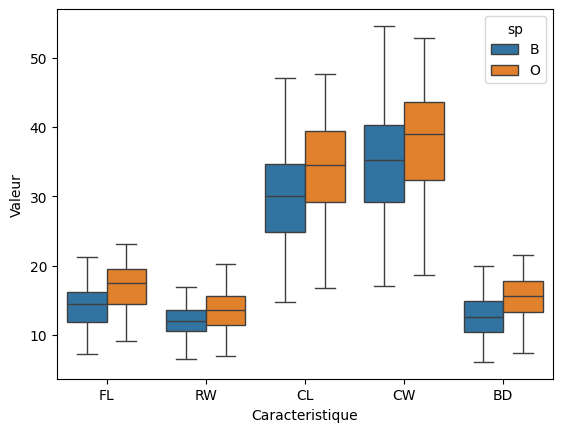

In [14]:
sn.boxplot(data = crbas_melt, y = "Valeur", x="Caracteristique", hue="sp")

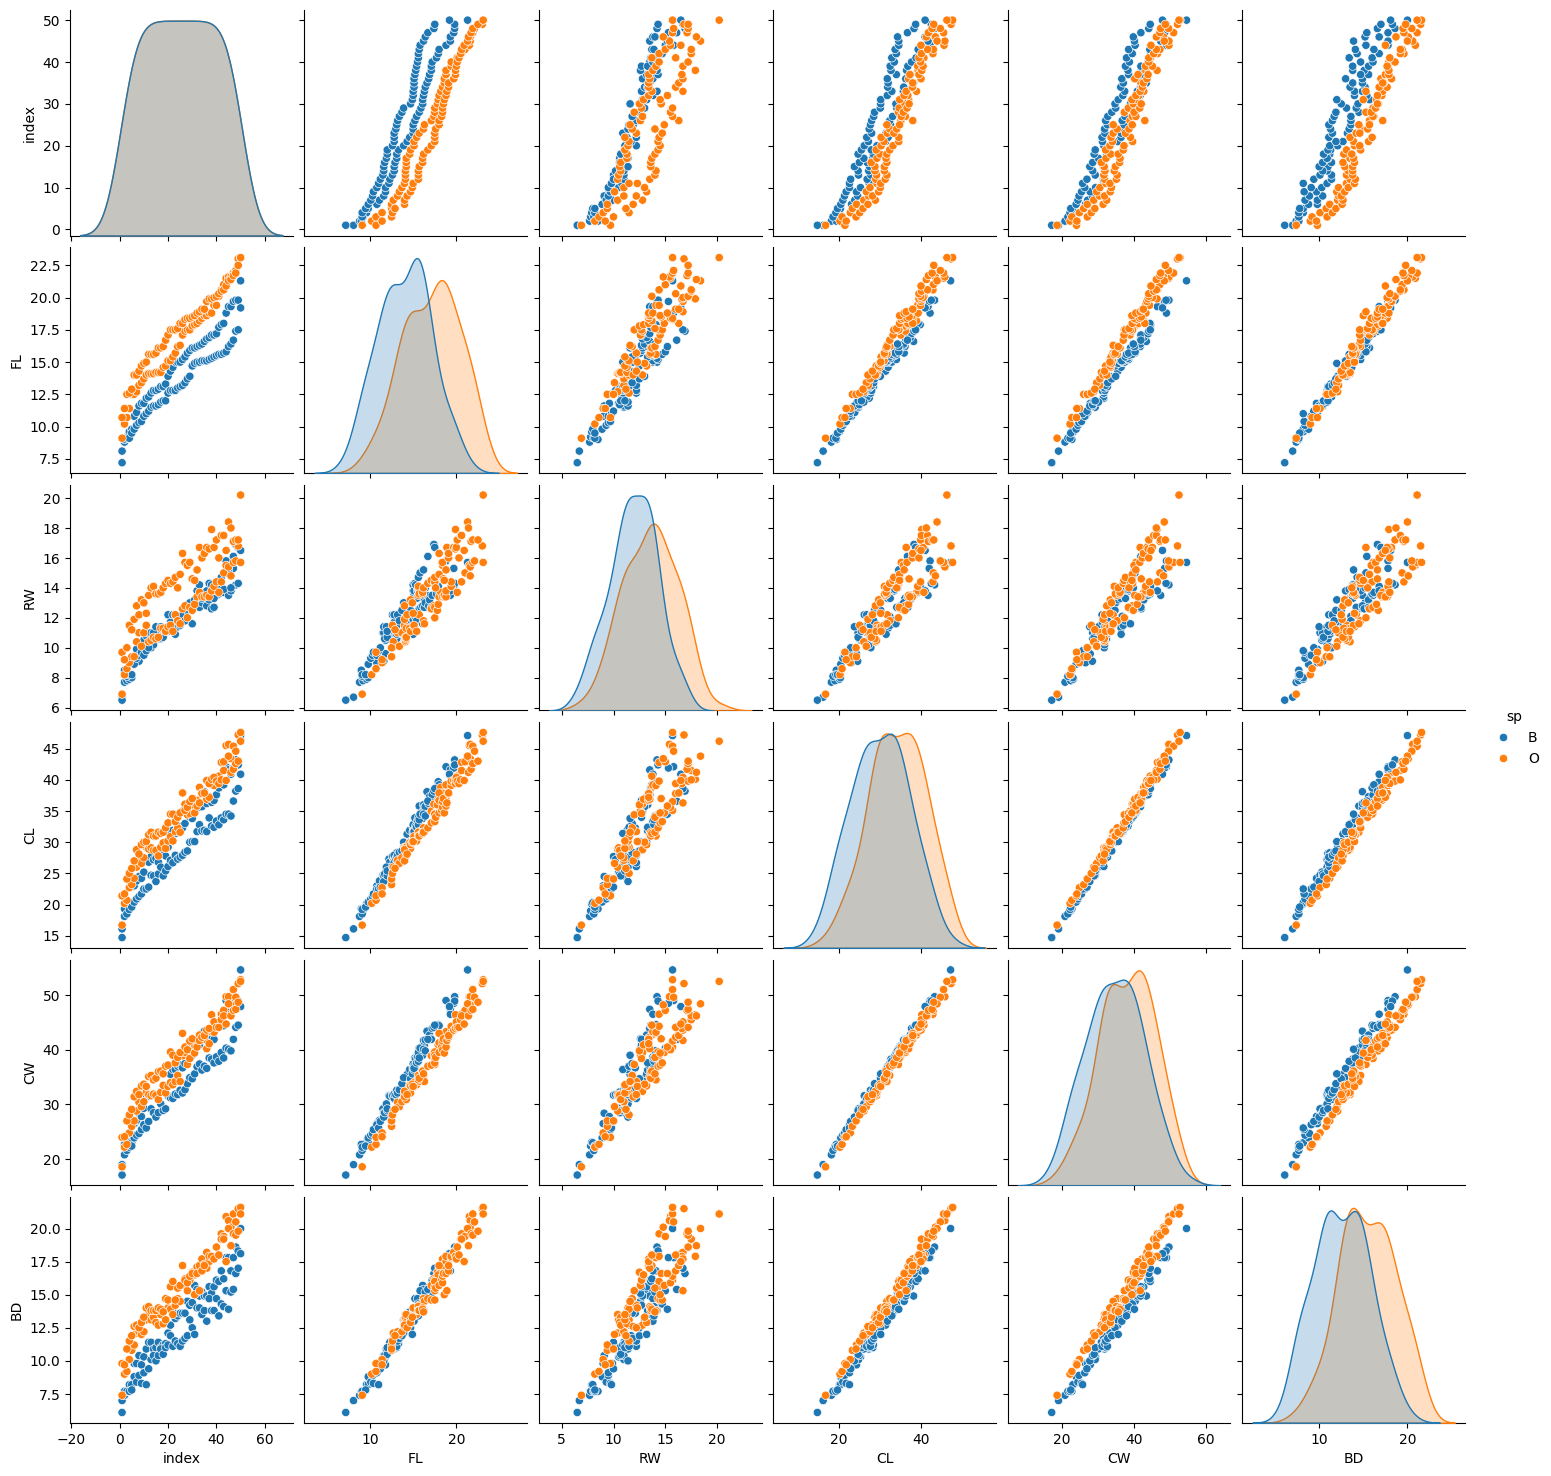

In [15]:
sn.pairplot(data = crabs, hue = "sp")

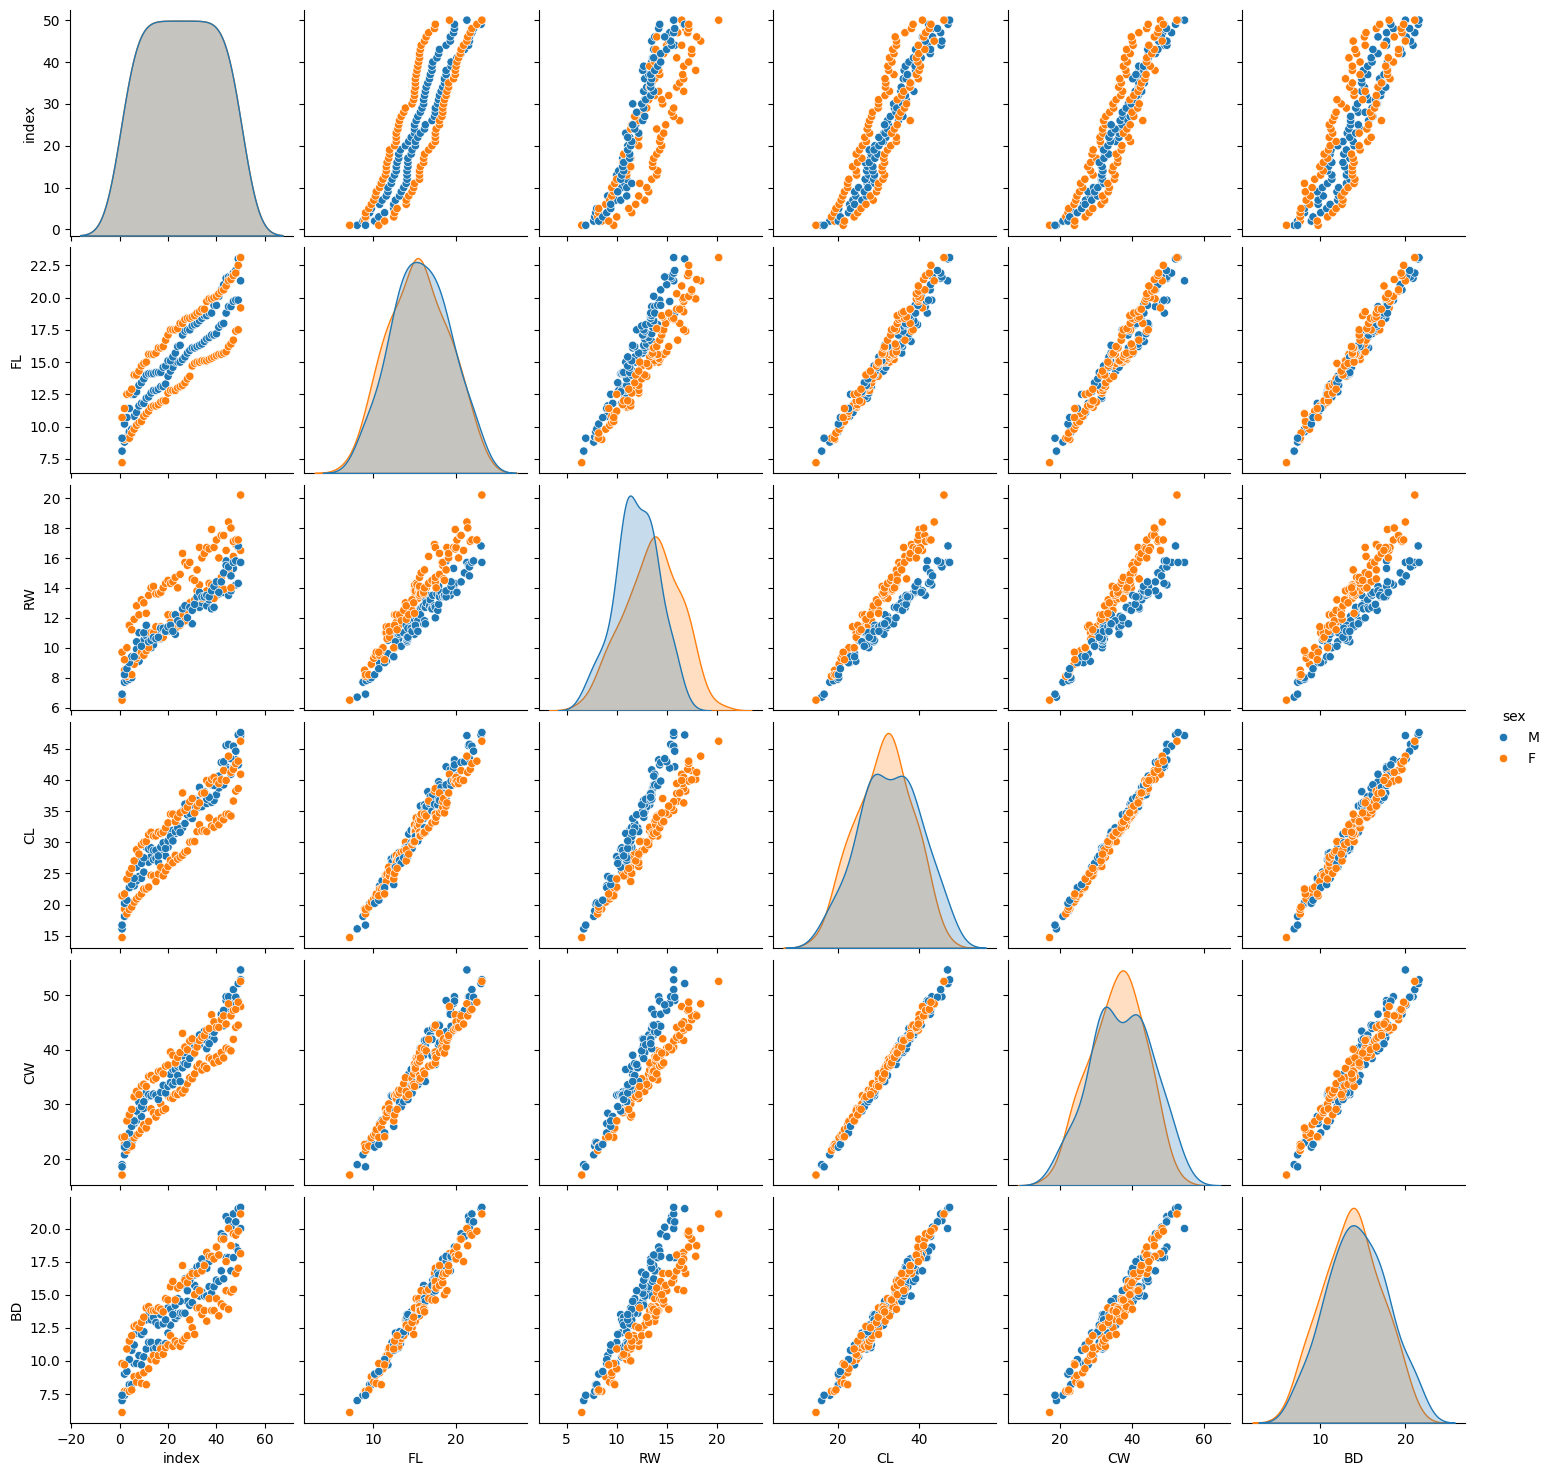

In [16]:
sn.pairplot(data = crabs, hue = "sex")

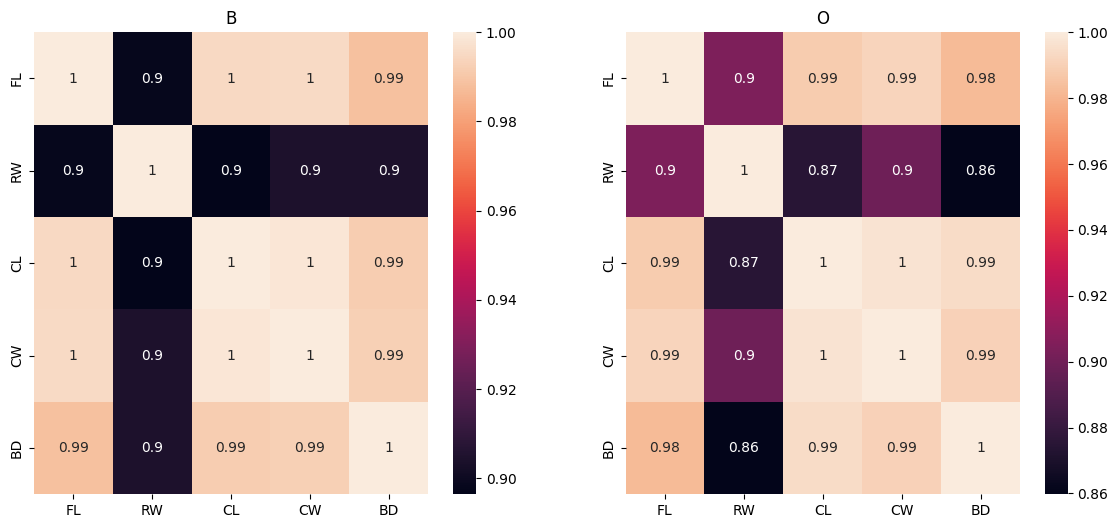

In [17]:
fig, axs = plt.subplots(ncols=2, figsize=(14, 6))
for i, species in enumerate(crabs["sp"].unique()):
    df = crabs[crabs["sp"] == species]
    corr = df.iloc[:, 3:8].corr()
    sn.heatmap(corr, annot=True, ax=axs[i]).set_title(f"{species}")

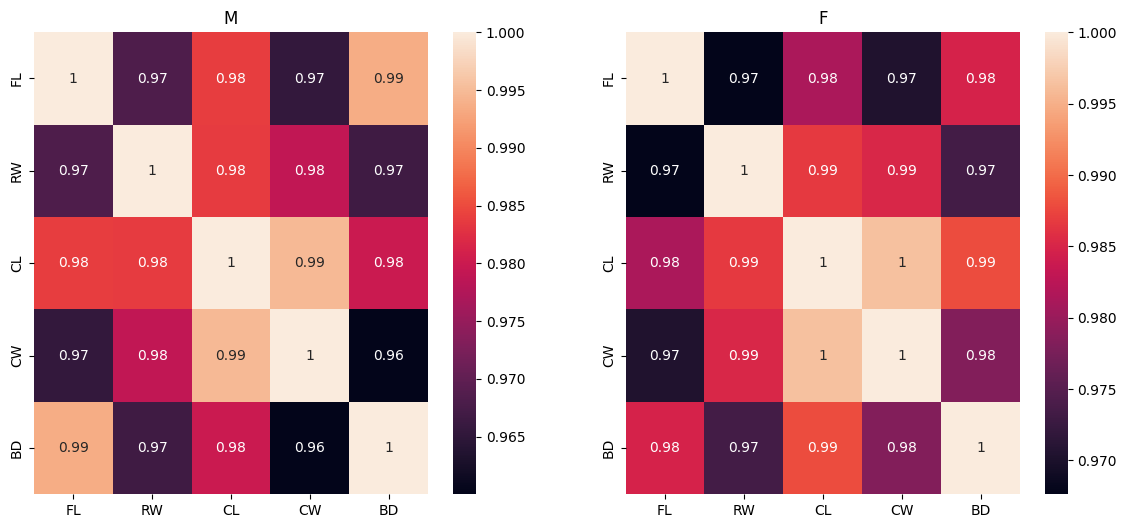

In [18]:
fig, axs = plt.subplots(ncols=2, figsize=(14, 6))
for i, sex in enumerate(crabs["sex"].unique()):
    df = crabs[crabs["sex"] == sex]
    corr = df.iloc[:, 3:8].corr()
    sn.heatmap(corr, annot=True, ax=axs[i]).set_title(f"{sex}")

### 1.2.2 ACP des données Crabs

In [19]:
# ACP sur crabsquant

cls = PCA(n_components=5)
pcs = cls.fit_transform(crabsquant)

print(cls.components_)
print(cls.explained_variance_ratio_)

[[-0.28898096 -0.19728237 -0.5993986  -0.66165498 -0.28373171]
 [-0.32325003 -0.86471586  0.19822633  0.28797897 -0.1598447 ]
 [-0.5071698   0.41413564 -0.17532992  0.4913755  -0.54688207]
 [ 0.73429069 -0.14830922 -0.14359407  0.12562819 -0.63436572]
 [-0.12488158  0.14086231  0.74166556 -0.4712202  -0.43868682]]
[9.82471800e-01 9.05510844e-03 6.98433738e-03 9.44721838e-04
 5.44032848e-04]


[Text(0.5, 1.0, 'Représentation en dimension 2 dans la nouvelle base')]

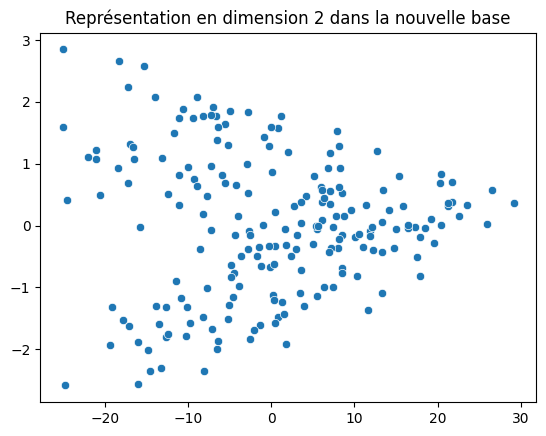

In [20]:
sn.scatterplot(x = pcs[:, 0], y = pcs[:, 1]).set(title = "Représentation en dimension 2 dans la nouvelle base")


[Text(0.5, 1.0, 'Représentation en dimension 2 dans la nouvelle base')]

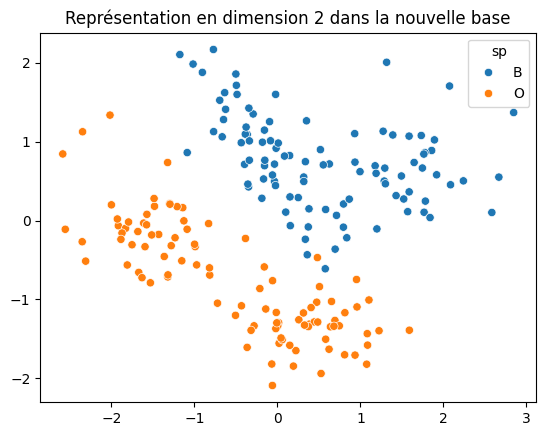

In [21]:
# Amélioration de la visualisation : on retire la première composante
sn.scatterplot(x = pcs[:, 1], y = pcs[:, 2], hue=crabs["sp"]).set(title = "Représentation en dimension 2 dans la nouvelle base")


[Text(0.5, 1.0, 'Représentation en dimension 2 dans la nouvelle base')]

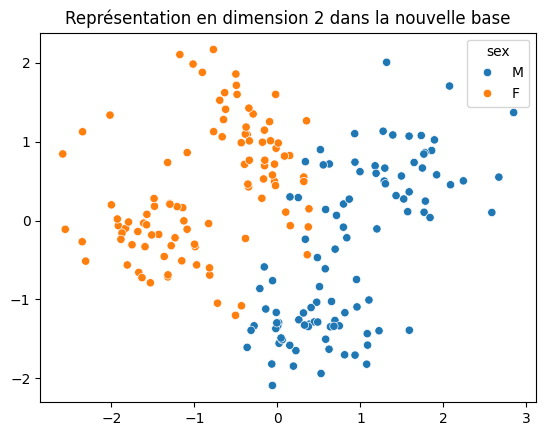

In [22]:
sn.scatterplot(x = pcs[:, 1], y = pcs[:, 2], hue=crabs["sex"]).set(title = "Représentation en dimension 2 dans la nouvelle base")


## 2. Exercices

In [23]:
notes = pd.read_csv("data/notes.txt", sep = "\s+")
notes

,math,scie,fran,lati,d-m
jean,6.0,6.0,5.0,5.5,8
alin,8.0,8.0,8.0,8.0,9
anni,6.0,7.0,11.0,9.5,11
moni,14.5,14.5,15.5,15.0,8
didi,14.0,14.0,12.0,12.5,10
andr,11.0,10.0,5.5,7.0,13
pier,5.5,7.0,14.0,11.5,10
brig,13.0,12.5,8.5,9.5,12
evel,9.0,9.5,12.5,12.0,18


In [61]:
M = np.diag(np.ones(notes.shape[1]))
Dp = np.eye(notes.shape[0]) / notes.shape[0]

In [63]:
notes_center = notes - notes.mean()
notes_center = notes_center.to_numpy()

In [64]:
import scipy.linalg as linalg

V = notes_center.T @ Dp @ notes_center

# Calcul des valeurs propres et vecteurs propres
valprop, vectprop = linalg.eigh(V @ M)

# Tri des valeurs propres
index = np.argsort(valprop)[::-1]
valprop = valprop[index]
vectprop = vectprop[:, index]


valprop, vectprop

(array([2.82532498e+01, 1.20747233e+01, 8.61573358e+00, 2.17321823e-02,
        9.86980472e-03]),
 array([[-0.51453535,  0.56694916, -0.05132308, -0.28874852,  0.57254891],
        [-0.50698853,  0.37199576, -0.01445296,  0.55305647, -0.54635285],
        [-0.49235486, -0.65035356,  0.10806565,  0.39373536,  0.40978192],
        [-0.48462835, -0.32323853,  0.02254331, -0.67419539, -0.45343643],
        [-0.03062778, -0.11289333, -0.99245689,  0.03443659,  0.01266839]]))

In [66]:
# Calcul des coordonnées des individus dans la nouvelle base
C = notes_center @ M @ vectprop
C

array([[ 8.70090684,  1.70270455,  2.55391818, -0.14945398, -0.11731596],
       [ 3.93859585,  0.70854405,  1.81046443, -0.09068389,  0.04349922],
       [ 3.20939241, -3.45905516,  0.30066167,  0.17254286,  0.01928215],
       [-9.75574148, -0.21574207,  3.34367256, -0.17347137,  0.10041455],
       [-6.37142221,  2.17333261,  0.95705878,  0.07066256, -0.18799232],
       [ 2.97401714,  4.65093218, -2.63494569, -0.02321315,  0.14809545],
       [ 1.05096657, -6.22717416,  1.68806364,  0.11529582,  0.04281219],
       [-1.98053256,  4.06855621, -1.40071215,  0.24321198,  0.01039742],
       [-1.76618257, -3.40209823, -6.61818142, -0.16489082, -0.0591927 ]])

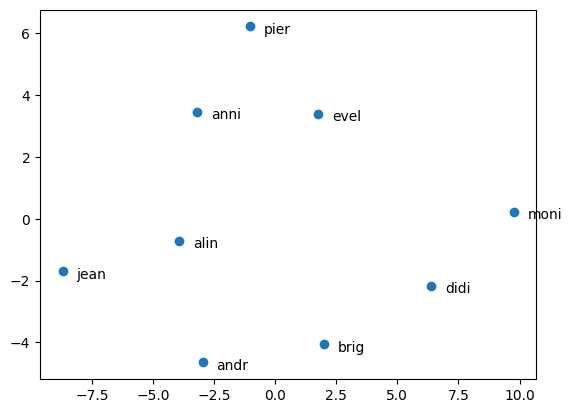

In [68]:
plt.scatter(-C[:, 0], -C[:, 1])
add_labels(-C[:, 0], -C[:, 1], notes.index)
plt.show()

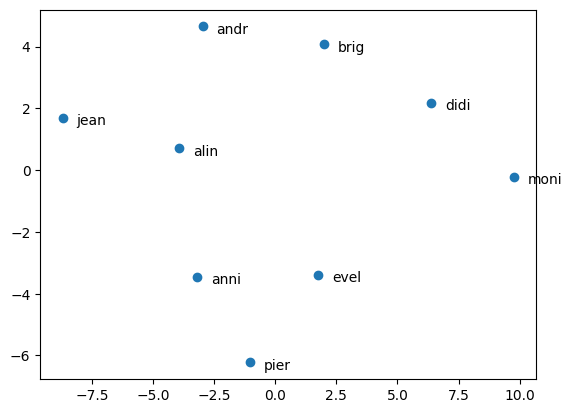

(9, 9)

In [75]:
# Retrouver les composantes principales à l'aide de la matrice W

W = notes_center @ M @ notes_center.T

valp, vecp = linalg.eigh(W @ Dp)

# Forçage à 0 (les valeurs propres doivent être positives)
valp = np.maximum(valp, 0)
valp = valp[::-1]
vecp = vecp[:, ::-1]

# Les composantes principales sont normées. On ajuste la variance pour coincider avec les valeurs propres
C = vecp * np.sqrt((valp / np.sum(Dp @ vecp**2, axis=0)))
plt.scatter(C[:, 0], C[:, 1])
add_labels(C[:, 0], C[:, 1], notes.index)
plt.show()

